In [315]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
dt=pd.read_csv('D:/pyLX/NYstockprices.csv')

In [316]:
# ma5: average of previous 5 closing price
# ma3: average of previous 30 closing price
dt['ma5']=dt['open'].rolling(5).mean()      # calculate the mean of the previous 5 closing price and put into ma5
dt['ma30']=dt['open'].rolling(30).mean()
dt.head(10)

,date,symbol,open,close,low,high,volume,ma5,ma30
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0,NaN,NaN
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0,NaN,NaN
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0,NaN,NaN
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0,NaN,NaN
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0,119.508000,NaN
5,2016-01-12 00:00:00,WLTW,115.510002,115.550003,114.500000,116.059998,1098000.0,117.924000,NaN
6,2016-01-13 00:00:00,WLTW,116.459999,112.849998,112.589996,117.070000,949600.0,116.168001,NaN
7,2016-01-14 00:00:00,WLTW,113.510002,114.379997,110.050003,115.029999,785300.0,115.594002,NaN
8,2016-01-15 00:00:00,WLTW,113.330002,112.529999,111.919998,114.879997,1093700.0,115.164001,NaN
9,2016-01-19 00:00:00,WLTW,113.660004,110.379997,109.870003,115.870003,1523500.0,114.494002,NaN


In [317]:
dt1=dt[(dt['date']>'2016-01-21')&(dt['date']<'2016-12-14')]

In [318]:
#dt1.symbol.unique()

In [319]:
dt2=dt1[dt1.symbol=='AIV']
#dt2.head()
dt2.describe()

,open,close,low,high,volume,ma5,ma30
count,228.000000,228.000000,228.000000,228.000000,2.280000e+02,228.000000,228.000000
mean,42.043860,42.081710,41.624254,42.454079,1.290852e+06,62.513737,61.015136
std,2.746604,2.716198,2.725458,2.710364,5.241797e+05,5.267807,3.686190
min,35.240002,35.450001,34.970001,35.820000,4.677000e+05,50.123999,50.717667
25%,40.380001,40.475000,40.005000,40.707499,9.452500e+05,58.362501,59.554500
50%,42.100001,42.125000,41.774999,42.555000,1.194550e+06,62.713000,61.658666
75%,44.222501,44.200001,43.735000,44.487499,1.539500e+06,67.659501,64.103417
max,47.820000,47.590000,47.080002,47.910000,3.795800e+06,69.934000,65.882000


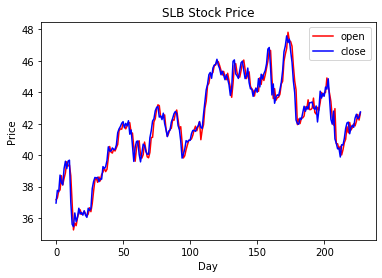

In [320]:
plt.plot(dt2.open.values,color='red',label='open')
plt.plot(dt2.close.values,color='blue',label='close')
plt.title('AIV Stock Price')
plt.xlabel('Day')
plt.ylabel('Price')
plt.legend(loc='best')

In [321]:
# Death Cross: ma5 < ma30
sr1=dt2['ma5']>dt2['ma30']
sr2=dt2['ma5']<=dt2['ma30']
dt2[(sr1&sr2.shift(1))]

,date,symbol,open,close,low,high,volume,ma5,ma30
755828,2016-03-31 00:00:00,AIV,41.669998,41.820000,41.470001,41.950001,1269300.0,59.738000,59.716667
756826,2016-04-04 00:00:00,AIV,42.020000,42.130001,41.840000,42.189999,1057500.0,60.300001,60.219667


In [322]:
death_cross=dt2[(sr1&sr2.shift(1))].index

In [323]:
# Golden Cross: ma5 > ma30
dt2[-(sr1|sr2.shift(1))]

,date,symbol,open,close,low,high,volume,ma5,ma30
738363,2016-02-09 00:00:00,AIV,35.240002,35.450001,35.000000,35.820000,2116700.0,50.690001,51.022334
756327,2016-04-01 00:00:00,AIV,41.650002,42.029999,41.619999,42.139999,842100.0,59.372000,59.416666
830762,2016-11-01 00:00:00,AIV,43.990002,43.630001,43.299999,44.340000,1618900.0,58.544001,60.877333


In [324]:
golden_cross=dt2[-(sr1|sr2.shift(1))].index

In [325]:
# Suppose you have $10000 on Jan-1, 2016 planning to invest on stocks
# Decision: buy stocks when the day is Golden Cross; sell stocks when the day is Death Cross
fund=10000
money=fund
hold=0
sr1=pd.Series(1,index=golden_cross)
sr2=pd.Series(0,index=death_cross)
label=sr1.append(sr2).sort_index()
label

738363    1
755828    0
756327    1
756826    0
830762    1
dtype: int64

In [326]:
for i in range(0,len(label)):
    p=dt1['open'][label.index[i]]
    if label.iloc[i]==1:
        buy=(money//(100*p))
        hold+=buy*100
        money-=buy*100*p
    else:
        money+=hold*p
        hold=0
p = dt1['open'][dt1.index[-1]]
final = hold*p+money
print(final-fund)

3417.9981999999964
